# Introdução à Clusterização com K-Means

## **Objetivo da Aula**

Introduzir o conceito de clusterização não supervisionada utilizando o algoritmo **K-Means**, apresentando seu funcionamento e aplicação prática através de um exemplo em Python com a biblioteca `scikit-learn`.

## **O que é Clusterização?**

A **clusterização** (ou agrupamento) é uma técnica de **aprendizado não supervisionado**. Diferentemente de problemas supervisionados, como classificação ou regressão, na clusterização **não temos rótulos conhecidos** previamente.

O objetivo é **agrupar objetos semelhantes** em conjuntos (*clusters*), de forma que:

- Objetos dentro de um mesmo grupo sejam **mais similares entre si**.
- Objetos de grupos diferentes sejam **menos similares**.

## **O que é o Algoritmo K-Means?**

O **K-Means** é um dos algoritmos mais populares de clusterização. Ele particiona os dados em *k* clusters com base nas distâncias entre os pontos.

**Características:**
- Não supervisionado
- Requer definir o número de clusters (`k`) previamente
- Iterativo: ajusta os centroides até convergir

**Passos do Algoritmo K-Means**

1. Escolher o número de clusters `k`.
2. Inicializar aleatoriamente `k` centroides.
3. Atribuir cada ponto ao centroide mais próximo (geralmente usando distância Euclidiana).
4. Recalcular os centroides com base na média dos pontos atribuídos a cada cluster.
5. Repetir passos 3 e 4 até os centroides estabilizarem ou atingirem um número máximo de iterações.

## **Exemplo Prático em Python**

Vamos analisar o código fornecido para entender como implementar o K-Means.

```python
import numpy as np
from sklearn.cluster import KMeans

# Exemplo simples de dados bidimensionais (sem rótulos)
data_cluster = np.array([
    [1,2],[1,4],[1,0],
    [10,2],[10,4],[10,0]
])

# Instanciar o K-Means com 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data_cluster)

print("=== K-Means ===")
print("Centroids:", kmeans.cluster_centers_)
print("Labels de cada ponto:", kmeans.labels_)
```

## **Análise do Código**

### Importações

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

- `numpy`: usado para manipulação numérica eficiente.
- `KMeans`: classe do `scikit-learn` que implementa o algoritmo K-Means.

### Definição dos Dados

In [3]:
data_cluster = np.array([
    [1,2],[1,4],[1,0],
    [10,2],[10,4],[10,0]
])

- Temos **6 pontos bidimensionais**, organizados em um array NumPy.
- Cada linha representa um ponto no plano cartesiano (x, y).

Visualizando os pontos:
- Grupo 1: `[1,2]`, `[1,4]`, `[1,0]` → estão próximos a (1, 2)
- Grupo 2: `[10,2]`, `[10,4]`, `[10,0]` → estão próximos a (10, 2)

Espera-se que o K-Means identifique esses dois grupos.

### Instanciação do Modelo

In [4]:
kmeans = KMeans(n_clusters=2, random_state=0)

- `n_clusters=2`: especificamos que queremos dividir os dados em **2 clusters**.
- `random_state=0`: garante reprodutibilidade dos resultados (evita aleatoriedade diferente a cada execução).

### Treinamento do Modelo

In [5]:
kmeans.fit(data_cluster)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


- O método `.fit()` executa o algoritmo nos dados fornecidos.
- Durante esse processo:
  - Centroides iniciais são escolhidos.
  - Os pontos são atribuídos aos clusters.
  - Os centroides são atualizados iterativamente.

### Resultados

In [6]:
print("=== K-Means ===")
print("Centroids:", kmeans.cluster_centers_)
print("Labels de cada ponto:", kmeans.labels_)

=== K-Means ===
Centroids: [[10.  2.]
 [ 1.  2.]]
Labels de cada ponto: [1 1 1 0 0 0]


#### Saída esperada (valores podem variar levemente):

```
=== K-Means ===
Centroids: [[1. 2.] [10. 2.]]
Labels de cada ponto: [0 0 0 1 1 1]
```


**Centróides**

Os centróides representam o **centro médio de cada cluster**.

No exemplo:
- Cluster 0: centróide `(1.0, 2.0)` → agrupa os pontos `[1,2], [1,4], [1,0]`
- Cluster 1: centróide `(10.0, 2.0)` → agrupa os pontos `[10,2], [10,4], [10,0]`

**Rótulos**

Cada ponto recebe um rótulo indicando a qual cluster pertence:
- `[0, 0, 0, 1, 1, 1]` → os três primeiros pontos estão no cluster 0; os três últimos no cluster 1.

### Plotando o gráfico

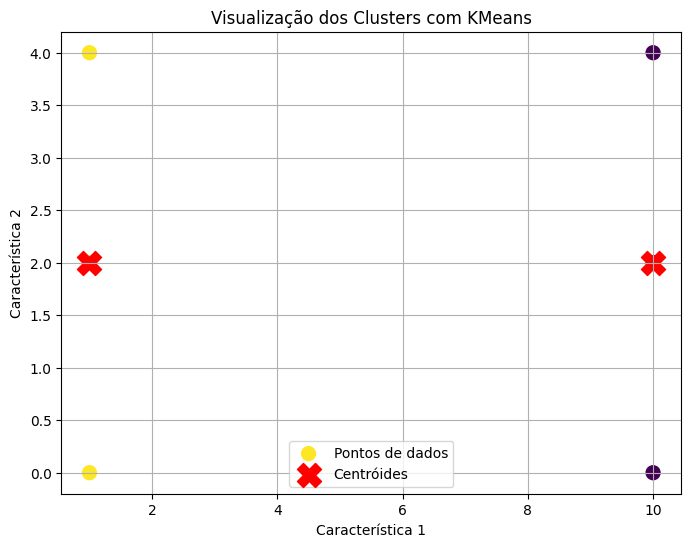

In [12]:
# === Seção nova: Gráfico de Dispersão ===
plt.figure(figsize=(8, 6))

# Plotar os pontos, cor separada por cluster
plt.scatter(data_cluster[:, 0], data_cluster[:, 1], c=kmeans.labels_, cmap='viridis', s=100, label='Pontos de dados')

# Plotar os centróides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centróides', marker='X')

plt.title('Visualização dos Clusters com KMeans')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True)
plt.show()

### Prever cluster para novas coordenadas 

In [ ]:
# Exemplo de novas coordenadas a serem classificadas
novas_coordenadas = np.array([
    [2, 3],     # Provavelmente no cluster 0
    [9, 1],     # Provavelmente no cluster 1
    [5, 2]      # Ponto intermediário - ver qual cluster mais próximo
])

# Fazer previsão
clusters_previstos = kmeans.predict(novas_coordenadas)

print("\n=== Previsão para novas coordenadas ===")
for i, coord in enumerate(novas_coordenadas):
    print(f"Coordenada {coord} pertence ao Cluster {clusters_previstos[i]}")


=== Previsão para novas coordenadas ===
Coordenada [2 3] pertence ao Cluster 1
Coordenada [9 1] pertence ao Cluster 0
Coordenada [5 2] pertence ao Cluster 1


## **Conclusão**


### O que aprendemos:
- O K-Means é um algoritmo poderoso para agrupar dados sem rótulos.
- Ele requer que você defina o número de clusters (`k`) antes de executá-lo.
- É fácil de usar e interpretar com a biblioteca `scikit-learn`.

### Aplicações práticas:
- Segmentação de clientes
- Agrupamento de documentos
- Análise exploratória de dados
- Identificação de padrões espaciais

### Limitações:
- Sensível ao valor inicial dos centroides
- Requer definição prévia de `k`
- Funciona melhor com dados esféricos e bem separados


## **Atividade Proposta para Fixação**

**Tarefa:** Modifique o código acima para testar com `n_clusters=3`. O que acontece com os resultados?

Dica: pense sobre o que ocorre quando tentamos agrupar dados em mais clusters do que realmente existem.